# Symbolic Computation

Python can comfortably work with symbols with the `sympy` library. 

As a first example, consider the expression $(x+y)^2$. One can use Python to expand this expression symbolically. All we need to do is to import the library `sympy`, introduce the symbols `x` and `y` to the program, and then use the method `expand`.

In [102]:
from sympy import symbols, factor, expand

x = symbols('x')
y = symbols('y')
z = (x + y)**2

expand(z)

x**2 + 2*x*y + y**2

The method `factor` can do the inverse of `expand`, namely factorise an expression.

In [103]:
factor(x**3 - y**3)

(x - y)*(x**2 + x*y + y**2)

While expansion of an algebraic expression is a simple and routine procedure,
the factorisation of algebraic expressions is often quite challenging. Try to factorise the expression $x^{10} + x^5 + 1$. Here is one way to do it:

$$
x^{10}+x^5+1 = x^{10} + (x^9 - x^9)  + (x^8 - x^8) + \cdots  + (x^6 - x^6) +
 + (x^5 - x^5) + x^5 +  (x^4 - x^4) + \cdots + (x - x) +1\\
$$
$$
= x^{10} + x^9 + x^8 - x^9 - x^8 - x^7 + x^7 + x^6 +x^5 - x^6 - x^5 - x^4 +x^5 + x^4 + x^3 -x^3 -x^2 -x+x^2 +x+1\\
$$
$$
= x^8(x^2+x+1) - x^7(x^2+x+1) + x^5(x^2+x+1) - x^4(x^2+x+1) + x^3(x^2+x+1) - x(x^2+x+1) + x^2+x+1\\
$$
$$
= (x^2+x+1)(x^8 - x^7 + x^5 - x^4 + x^3 - x + 1)
$$

Python easily comes up with this factorization: 

In [104]:
factor(x**10 + x**5 +1)

(x**2 + x + 1)*(x**8 - x**7 + x**5 - x**4 + x**3 - x + 1)

## Exercise

- Factorise the polynomial $(1 + x)^{30} + (1 − x)^{30}$.

- Prove that the product of four consecutive numbers plus one is always a square number.

In addition to factorization and expansion, the `sympy` library also offers the `simplify` function for simplifying expressions as much as possible.

Consider showing that

$$
\frac{1}{1+\frac{1}{1+\frac{1}{1+\frac{1}{1+x}}}} = \frac{3+2x}{5+3x}.
$$

To do so, we first define $f(x)=\frac{1}{1+x}$ and we can construct the function on the left side of the equality by composition:

In [105]:
def f(x):
    return 1/(1+x)

x = symbols('x')

left_side = f(f(f(f(x))))
left_side

1/(1 + 1/(1 + 1/(1 + 1/(x + 1))))

We can now use the `simplify` function to simplify the expression and check whether the equality holds:

In [106]:
from sympy import simplify

simplify(left_side)

(2*x + 3)/(3*x + 5)

In [107]:
simplify(left_side) == (2*x +3)/(3*x +5)

True

## Graphics in `sympy`

It is always very helpful to present the behaviour of a function, an equation or a collection of data by plotting their graphs and visualising them.

To demonstrate the graphical utilities, we start by defining the function $f(x)=\sin(x)/x$ and plot its graph
between $−10\pi$ and $10\pi$.

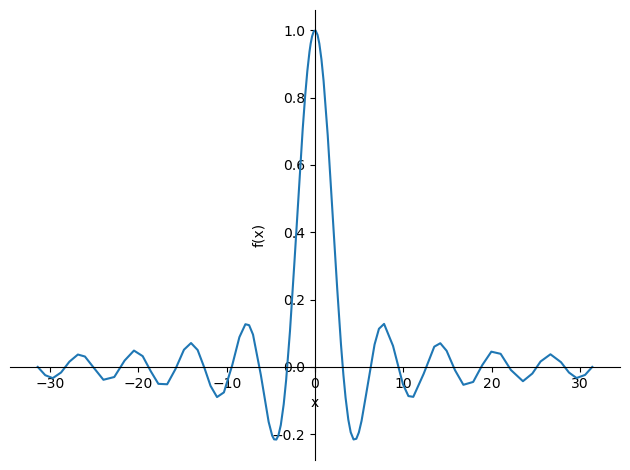

In [108]:
from sympy import sin, symbols, pi
from sympy.plotting import plot

def f(x):
    return sin(x) / x

x = symbols('x')

plot(f(x), (x, -10 * pi, 10 * pi));

You can plot several functions on the same plot:

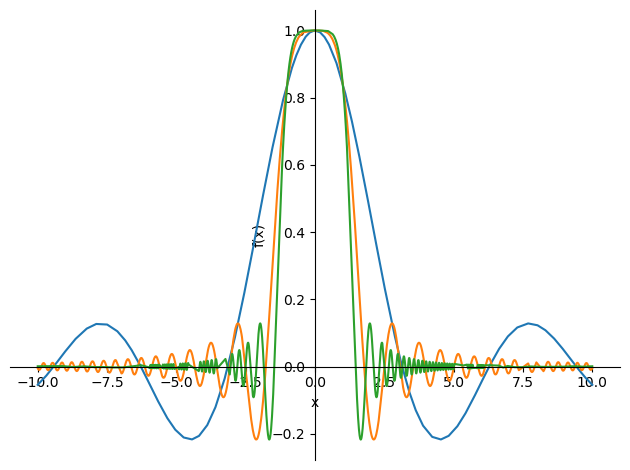

In [109]:
def g(x):
    return sin(x**2) / x**2

def h(x):
    return sin(x**3) / x**3

x = symbols('x')

plot(f(x), g(x), h(x));

In some cases, we may want to sample more points for plotting. To do so, you specify inputs `adaptive` and `n` in the `plot` function. For example,

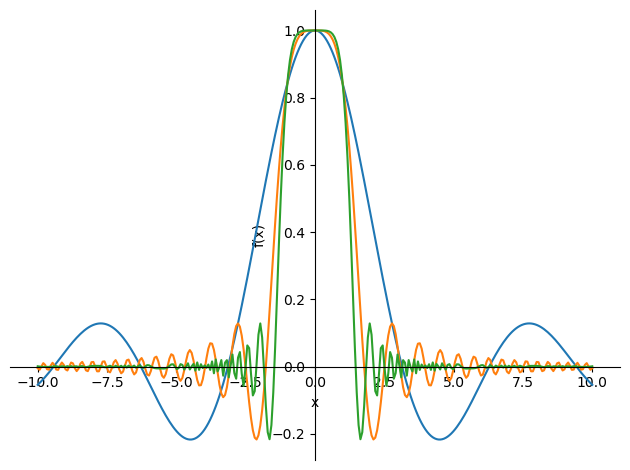

In [110]:
plot(f(x), g(x), h(x), adaptive=False, n=200);

## Exercise

Define the function $f(x)=||x|−1|$ and plot $f(x)$, $f(f(x))$ and $f(f(f(x)))$. The absolute value function $|\cdot|$ is defined as `Abs` in Python's `sympy`.

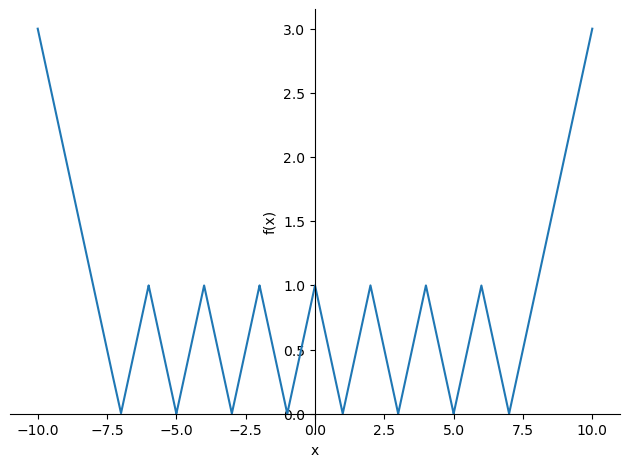

In [113]:
from sympy import sin, symbols, Abs
from sympy.plotting import plot

def f(x):
    return Abs(Abs(x) - 1)

x = symbols('x')

plot(f(f(f(f(f(f(f(x))))))), (x,-10,10));

# Limits and Derivatives

We start with the limit of the function

$$
\lim_{h\rightarrow 0} \frac{(x+h)^n-x^n}{h}.
$$

`sympy` provides the command `limit` for exploring the limit of a function.

In [114]:
from sympy import limit, symbols

x = symbols('x')
n = symbols('n')
h = symbols('h')

def f(x,n):
    return x**n

def f_p(x,n):
    return limit((f(x+h,n)-f(x,n))/h, h, 0)

f_p(x,n)

n*x**(n - 1)

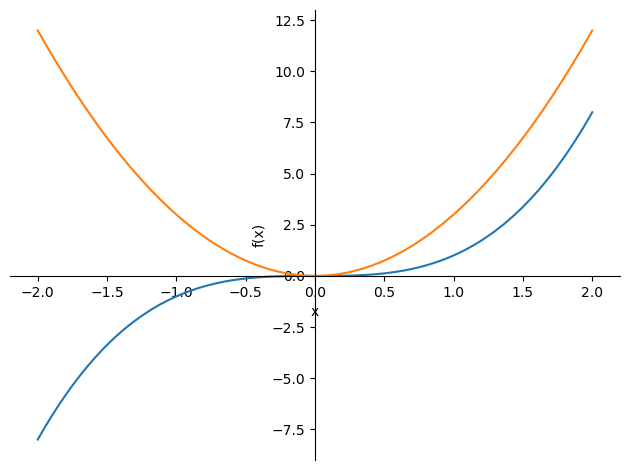

In [78]:
from sympy.plotting import plot

plot(f(x,3), f_p(x,3), (x,-2,2));

You can also obtain the derivative directly with the `diff` function.

In [82]:
from sympy import diff

diff(f(x,n),x)

n*x**n/x

You may notice the expression can be further simplified. You can simplify the expression with  the `simplify` function.

In [80]:
from sympy import simplify

simplify(diff(f(x,n),x))

n*x**(n - 1)

## Exercise

Investiage the behavior of $f(x)=\frac{\sin(x)}{x}$ when $x\rightarrow 0$. In addition, find $f'(x)$.

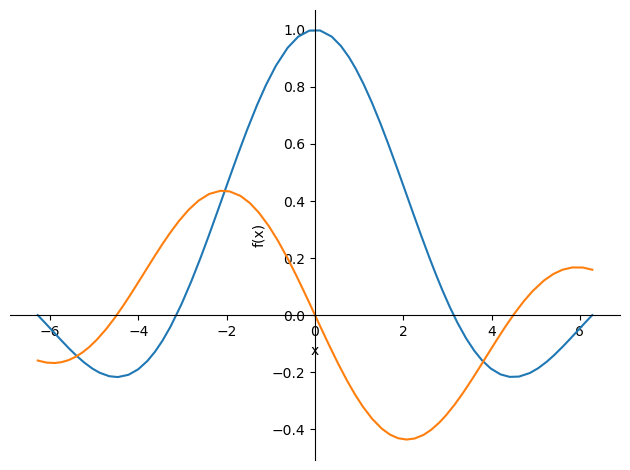

In [116]:
from sympy import limit, symbols, sin, pi
from sympy.plotting import plot

def f(x):
    return sin(x)/x

x = symbols('x')

plot(f(x), diff(f(x)), (x,-2*pi,2*pi));

# Three-Dimensional Graphs

In a similar manner, one can define functions of several variables. Here is a simple example defining $f(x,y)=\sqrt{x^2+y^2}$:

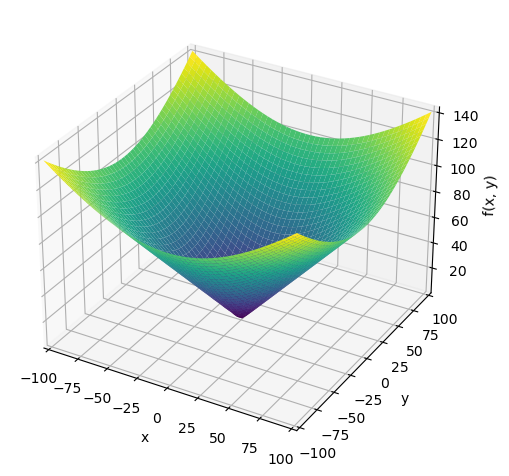

In [117]:
from sympy import sqrt
from sympy.plotting import plot3d

def f(x, y):
    return sqrt(x**2 + y**2)

x = symbols('x')
y = symbols('y')

plot3d(f(x, y), (x, -100, 100), (y, -100, 100));

The partial deriviatves $\partial f/\partial x$ and $\partial f/\partial y$ with the `diff` function:


In [119]:
diff(f(x,y), x), diff(f(x,y), y)

(x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2))

## Exercise

In which direction at $(x,y)=(1,1)$, the $f(x,y)=\sqrt{x^2+y^2}$ decreases at the fastest rate. 